### Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path

path = r'C:\Users\fiyin\OneDrive\Documents\InstaCart Basket Analysis'

In [3]:
# Import primary data set

ords_prods_cust = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared data', 'instacart_combined.pkl'))

In [4]:
# Import departments data

dept = pd.read_csv(os.path.join(path, '02. Data', 'Prepared data', 'departments_wrangled.csv'), index_col = False)

In [5]:
ords_prods_cust.shape

(32399732, 31)

In [6]:
ords_prods_cust.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [7]:
dept.shape

(21, 2)

In [8]:
dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
# Rename 'Unnamed: 0' column to department_id

dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [10]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# Merging departments data with primary data set

ords_prods_cust = ords_prods_cust.merge(dept, on = 'department_id')

In [7]:
ords_prods_cust.shape

(32399732, 32)

In [8]:
ords_prods_cust.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income,department
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,beverages
1,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,beverages
2,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,beverages
3,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,beverages
4,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,beverages


### 2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
##### *The first and last names are potential security implications. They will be dropped before continuing analysis.

In [9]:
# Dropping first name and last name columns.

ords_prods_cust = ords_prods_cust.drop(columns = ['first_name', 'last_name'])

In [10]:
ords_prods_cust.shape

(32399732, 30)

In [11]:
ords_prods_cust.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_last_order,customer_frequency,gender,state,age,date_joined,no_of_dependants,marital_status,income,department
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,beverages
1,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,beverages
2,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,beverages
3,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,beverages
4,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,beverages


### 3.  Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [12]:
# Creating list of northeastern states

region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
           'Connecticut', 'New York', 'Pennsylvania',  'New Jersey']

In [13]:
# Creating list of midwestern states

region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 
           'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']


In [14]:
# Creating list of southern states

region3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
           'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 
           'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [15]:
# Creating list of western states

region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 
           'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
# Defining region northeast in dataframe

ords_prods_cust.loc[ords_prods_cust['state'].isin(region1), 'region'] = 'northeast'

In [17]:
# Defining region midwest in dataframe

ords_prods_cust.loc[ords_prods_cust['state'].isin(region2), 'region'] = 'midwest'

In [19]:
# Defining region south in dataframe

ords_prods_cust.loc[ords_prods_cust['state'].isin(region3), 'region'] = 'south'

In [20]:
# Defining region west in dataframe

ords_prods_cust.loc[ords_prods_cust['state'].isin(region4), 'region'] = 'west'

In [21]:
# Check results

ords_prods_cust['region'].value_counts(dropna = False)

south        10790096
west          8291679
midwest       7596065
northeast     5721892
Name: region, dtype: int64

### 3b. Determine whether there’s a difference in spending habits between the different U.S. regions

In [22]:
# Check spending habits column

ords_prods_cust['spending_habits'].value_counts(dropna = False)

Low spender     31770614
High spender      629118
Name: spending_habits, dtype: int64

In [27]:
# Compare spending habits by region

pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_habits'], dropna = False)

spending_habits,High spender,Low spender
region,,
midwest,154715,7441350
northeast,107381,5614511
south,207902,10582194
west,159120,8132559


###### *The Southern region has both the highest and lowest spending customers. There is generally more low spenders than high spenders in all the regions.

### 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [28]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'number_of_items_ordered', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_habits', 'median_days_last_order', 'customer_frequency',
       'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', 'department', 'region'],
      dtype='object')

In [29]:
# Flag for low-activity customers. Stored in new column 'customer_activity'

ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'customer_activity'] = 'Low'

In [23]:
# Flag for normal-activity customers. Stored in column 'customer_activity'

ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'customer_activity'] = 'Normal'

In [31]:
# Check results

ords_prods_cust['customer_activity'].value_counts(dropna = False)

Normal    30959687
Low        1440045
Name: customer_activity, dtype: int64

In [34]:
# Create subset dataframe for low-activity customers

low_activity = ords_prods_cust.loc[ords_prods_cust['customer_activity'] == 'Low']

In [35]:
low_activity.shape

(1440045, 32)

In [36]:
low_activity.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,no_of_dependants,marital_status,income,department,region,customer_activity
282,520620.0,120,1.0,3.0,11.0,NaN,196.0,2.0,0.0,Soda,...,Female,Kentucky,54,2017-03-02,2,married,99219,beverages,south,Low
283,3273029.0,120,3.0,2.0,8.0,19.0,196.0,2.0,1.0,Soda,...,Female,Kentucky,54,2017-03-02,2,married,99219,beverages,south,Low
284,520620.0,120,1.0,3.0,11.0,NaN,46149.0,1.0,0.0,Zero Calorie Cola,...,Female,Kentucky,54,2017-03-02,2,married,99219,beverages,south,Low
285,3273029.0,120,3.0,2.0,8.0,19.0,46149.0,1.0,1.0,Zero Calorie Cola,...,Female,Kentucky,54,2017-03-02,2,married,99219,beverages,south,Low
286,906054.0,120,2.0,4.0,7.0,15.0,31102.0,1.0,0.0,Sugar Free Energy Drink,...,Female,Kentucky,54,2017-03-02,2,married,99219,beverages,south,Low


In [32]:
ords_prods_cust.shape

(32399732, 32)

In [24]:
# Create subset dataframe using only normal activity customers

ords_prods_cust2 = ords_prods_cust.loc[ords_prods_cust['customer_activity'] == 'Normal']

In [34]:
ords_prods_cust2.shape

(30959687, 32)

In [35]:
ords_prods_cust2.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,no_of_dependants,marital_status,income,department,region,customer_activity
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,Female,Alabama,31,2019-02-17,3,married,40423,beverages,south,Normal
1,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2019-02-17,3,married,40423,beverages,south,Normal
2,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2019-02-17,3,married,40423,beverages,south,Normal
3,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2019-02-17,3,married,40423,beverages,south,Normal
4,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2019-02-17,3,married,40423,beverages,south,Normal


In [25]:
# Dropping customer_activity column

ords_prods_cust2 = ords_prods_cust2.drop(columns = ['customer_activity'])

In [37]:
ords_prods_cust2.shape

(30959687, 31)

In [42]:
# Export data for low-activity customers

low_activity.to_pickle(os.path.join(path, '02. Data', 'Prepared data', 'low_activity_customers.pkl'))

### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

### 6. Create an appropriate visualization to show the distribution of profiles.

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### 8. Compare your customer profiles with regions and departments

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

### Age profiling
Below 35 years - Young adult

35 to 65 years - Middle age

Above 65 years - Seniors

In [67]:
# Summary statistics on age column

ords_prods_cust2['age'].describe().round()

count    30959687.0
mean           49.0
std            18.0
min            18.0
25%            33.0
50%            49.0
75%            65.0
max            81.0
Name: age, dtype: float64

In [68]:
# Young adult age group flag. Stored in new column age_profile

ords_prods_cust2.loc[ords_prods_cust2['age'] < 35, 'age_profile'] = 'Young adult'

In [27]:
# Middle age group flag

ords_prods_cust2.loc[(ords_prods_cust2['age'] >= 35) & (ords_prods_cust2['age'] < 65), 'age_profile'] = 'Middle age'

In [28]:
# Seniors age group flag

ords_prods_cust2.loc[ords_prods_cust2['age'] >= 65, 'age_profile'] = 'Seniors'

In [42]:
ords_prods_cust2.shape

(30959687, 32)

In [43]:
# Check result

ords_prods_cust2['age_profile'].value_counts(dropna = False)

Middle age     14524452
Young adult     8240968
Seniors         8194267
Name: age_profile, dtype: int64

In [29]:
# Create subset dataframe with unique user ids

distinct_user = ords_prods_cust2.drop_duplicates(subset=['user_id'])

In [30]:
distinct_user.shape

(162631, 32)

In [31]:
distinct_user.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,no_of_dependants,marital_status,income,department,region,age_profile
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,Female,Alabama,31,2019-02-17,3,married,40423,beverages,south,Young adult
13,2968173.0,15,15.0,1.0,9.0,7.0,196.0,2.0,0.0,Soda,...,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,beverages,midwest,Seniors
33,2293453.0,19,2.0,5.0,14.0,6.0,196.0,3.0,0.0,Soda,...,Female,Louisiana,62,2017-02-03,1,married,151988,beverages,south,Middle age
59,1573906.0,21,10.0,3.0,10.0,6.0,196.0,2.0,0.0,Soda,...,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,beverages,west,Seniors
109,1593000.0,31,10.0,3.0,8.0,7.0,196.0,17.0,0.0,Soda,...,Female,Oklahoma,38,2019-01-22,1,married,52311,beverages,south,Middle age


In [33]:
# Check age profile column frquency

distinct_user['age_profile'].value_counts(dropna = False)

Middle age     76230
Seniors        43250
Young adult    43151
Name: age_profile, dtype: int64

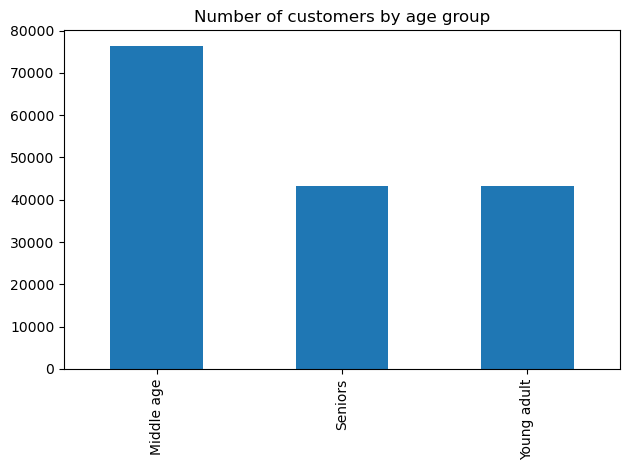

In [32]:
# Bar chart of count of age_profile

age_bar = distinct_user['age_profile'].value_counts().plot.bar()
plt.title('Number of customers by age group')
plt.tight_layout()

In [34]:
# Export chart

age_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_bar.png'))

In [35]:
# Aggregate average, minimum and maximum of usage frequency and age profile

ords_prods_cust2.groupby('age_profile').agg({'median_days_last_order': ['mean', 'min', 'max']})

median_days_last_order           
                              mean  min   max
age_profile                                  
Middle age                9.969374  0.0  30.0
Seniors                   9.932966  0.0  30.0
Young adult               9.959306  0.0  30.0

In [36]:
# Aggregate average, minimum and maximum of expenditure and age profile

ords_prods_cust2.groupby('age_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_profile                     
Middle age   7.790319  1.0  25.0
Seniors      7.796715  1.0  25.0
Young adult  7.784978  1.0  25.0

In [37]:
# Compare customer age profile with regions

age_region = pd.crosstab(distinct_user['age_profile'], distinct_user['region'], dropna = False)

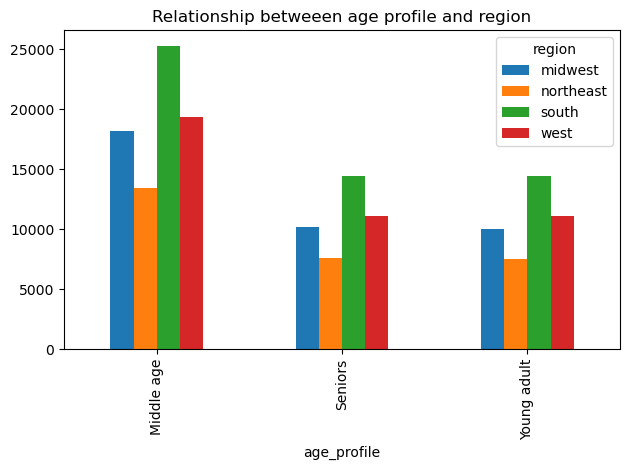

In [38]:
# Chart of age profile and region

age_region.plot(kind = 'bar', stacked = False)
plt.title('Relationship betweeen age profile and region')
plt.tight_layout()

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_region_bar.png'))

In [39]:
# Compare age profile and department

age_dept = pd.crosstab(ords_prods_cust2['department'], ords_prods_cust2['age_profile'], dropna = False)

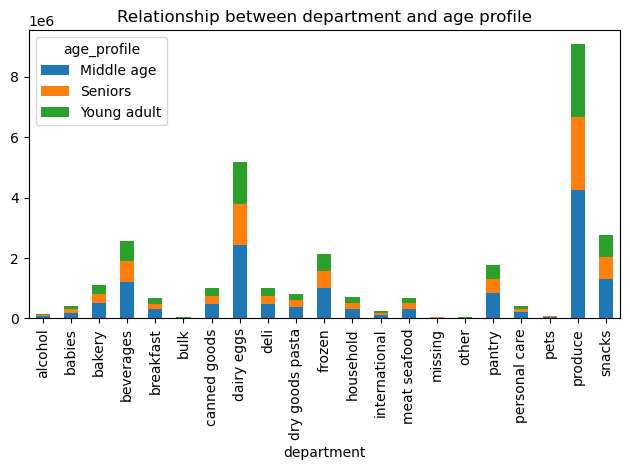

In [40]:
# Chart of department and age profile

age_dept.plot(kind = 'bar', stacked = True)
plt.title('Relationship between department and age profile')
plt.tight_layout()

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_dept_bar.png'))

### Income profiling


- 100,000 and below - Low income

- Between 100,000 and 400,000 - Middle income

- 400,000 and above - High income

In [41]:
# Summary statistics for income variable

ords_prods_cust2['income'].describe().round()

count    30959687.0
mean        99655.0
std         43091.0
min         25903.0
25%         67286.0
50%         96761.0
75%        128081.0
max        593901.0
Name: income, dtype: float64

In [42]:
# Low income flag. Stored in new column 'income_profile'

ords_prods_cust2.loc[ords_prods_cust2['income'] <= 100000, 'income_profile'] = 'Low income'

In [43]:
# Middle income flag

ords_prods_cust2.loc[(ords_prods_cust2['income'] > 100000) & 
                     (ords_prods_cust2['income'] < 400000),
                     'income_profile'] = 'Middle income'

In [44]:
# High income flag

ords_prods_cust2.loc[ords_prods_cust2['income'] >= 400000, 'income_profile'] = 'High income'

In [45]:
ords_prods_cust2.shape

(30959687, 33)

In [46]:
# Check results

ords_prods_cust2['income_profile'].value_counts(dropna = False)

Low income       16757273
Middle income    14155863
High income         46551
Name: income_profile, dtype: int64

In [47]:
# Update distinct_user dataframe

distinct_user = ords_prods_cust2.drop_duplicates(subset=['user_id'])

In [48]:
distinct_user.shape

(162631, 33)

In [49]:
distinct_user.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,no_of_dependants,marital_status,income,department,region,age_profile,income_profile
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,Alabama,31,2019-02-17,3,married,40423,beverages,south,Young adult,Low income
13,2968173.0,15,15.0,1.0,9.0,7.0,196.0,2.0,0.0,Soda,...,Indiana,69,2019-06-03,0,divorced/widowed,54313,beverages,midwest,Seniors,Low income
33,2293453.0,19,2.0,5.0,14.0,6.0,196.0,3.0,0.0,Soda,...,Louisiana,62,2017-02-03,1,married,151988,beverages,south,Middle age,Middle income
59,1573906.0,21,10.0,3.0,10.0,6.0,196.0,2.0,0.0,Soda,...,Montana,71,2019-06-18,0,divorced/widowed,124643,beverages,west,Seniors,Middle income
109,1593000.0,31,10.0,3.0,8.0,7.0,196.0,17.0,0.0,Soda,...,Oklahoma,38,2019-01-22,1,married,52311,beverages,south,Middle age,Low income


In [50]:
# Check income profile frequency

distinct_user['income_profile'].value_counts(dropna = False)

Low income       92551
Middle income    69911
High income        169
Name: income_profile, dtype: int64

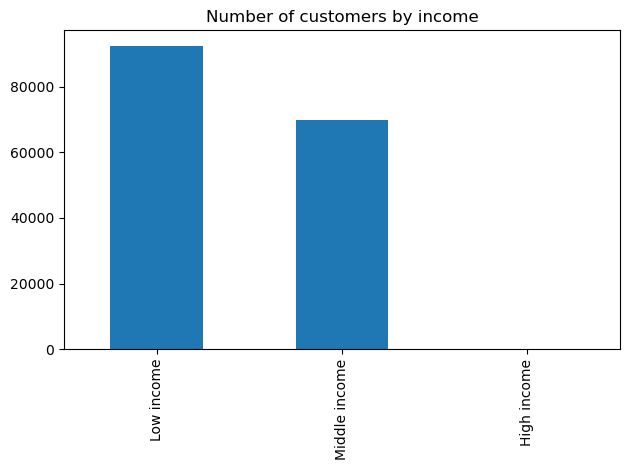

In [51]:
# Bar chart of count of income_profile

income_bar = distinct_user['income_profile'].value_counts().plot.bar()
plt.title('Number of customers by income')
plt.tight_layout()

In [52]:
# Export chart

income_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_bar.png'))

In [53]:
# Aggregate average, minimum and maximum of usage frequency and income profile

ords_prods_cust2.groupby('income_profile').agg({'median_days_last_order': ['mean', 'min', 'max']})

median_days_last_order           
                                 mean  min   max
income_profile                                  
High income                  9.232906  1.0  30.0
Low income                  10.020692  0.0  30.0
Middle income                9.884110  0.0  30.0

In [54]:
# Aggregate average, minimum and maximum of expenditure and income profile

ords_prods_cust2.groupby('income_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
income_profile                     
High income     7.738014  1.0  25.0
Low income      7.652571  1.0  25.0
Middle income   7.954146  1.0  25.0

In [55]:
# Compare income profile and region

income_region = pd.crosstab(distinct_user['income_profile'], distinct_user['region'], dropna = False)

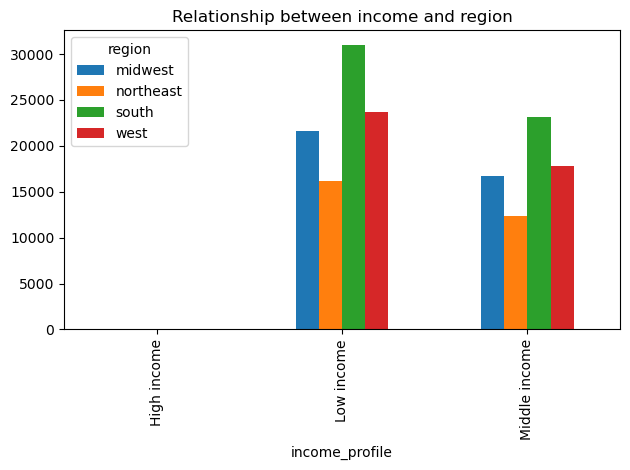

In [56]:
# Chart of income profile and region

income_region.plot(kind = 'bar', stacked = False)
plt.title('Relationship between income and region')
plt.tight_layout()

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_region_bar.png'))

In [57]:
# Compare department and income_profile

income_dept = pd.crosstab(ords_prods_cust2['department'], ords_prods_cust2['income_profile'], dropna = False)

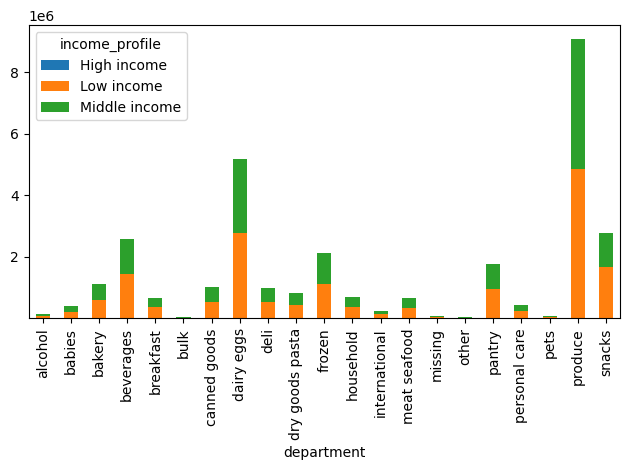

In [58]:
# Chart of department and income profile

income_dept.plot(kind = 'bar', stacked = True)
plt.tight_layout()

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_dept_bar.png'))

#### Number of dependents profiling


- 0: Single family/No dependents

- 1: Small family size

- 2: Medium family size

- 3: Large family size

In [59]:
# Check values

ords_prods_cust2['no_of_dependants'].value_counts(dropna = False)

3    7771309
0    7738508
2    7731924
1    7717946
Name: no_of_dependants, dtype: int64

In [60]:
# Single famliy flag. 

ords_prods_cust2.loc[ords_prods_cust2['no_of_dependants'] == 0, 'family_size'] = 'Single'

In [61]:
# Small family flag

ords_prods_cust2.loc[ords_prods_cust2['no_of_dependants'] == 1, 'family_size'] = 'Small'

In [62]:
# Medium family flag

ords_prods_cust2.loc[ords_prods_cust['no_of_dependants'] == 2, 'family_size'] = 'Medium'

In [63]:
# Large family flag

ords_prods_cust2.loc[ords_prods_cust['no_of_dependants'] >= 3, 'family_size'] = 'Large'

In [64]:
ords_prods_cust2.shape

(30959687, 34)

In [65]:
# Check result

ords_prods_cust2['family_size'].value_counts(dropna = False)

Large     7771309
Single    7738508
Medium    7731924
Small     7717946
Name: family_size, dtype: int64

In [66]:
# Update distinct_user dataframe

distinct_user = ords_prods_cust2.drop_duplicates(subset=['user_id'])

In [69]:
distinct_user.shape

(162631, 34)

In [70]:
distinct_user.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,no_of_dependants,marital_status,income,department,region,age_profile,income_profile,family_size
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,31,2019-02-17,3,married,40423,beverages,south,Young adult,Low income,Large
13,2968173.0,15,15.0,1.0,9.0,7.0,196.0,2.0,0.0,Soda,...,69,2019-06-03,0,divorced/widowed,54313,beverages,midwest,Seniors,Low income,Single
33,2293453.0,19,2.0,5.0,14.0,6.0,196.0,3.0,0.0,Soda,...,62,2017-02-03,1,married,151988,beverages,south,Middle age,Middle income,Small
59,1573906.0,21,10.0,3.0,10.0,6.0,196.0,2.0,0.0,Soda,...,71,2019-06-18,0,divorced/widowed,124643,beverages,west,Seniors,Middle income,Single
109,1593000.0,31,10.0,3.0,8.0,7.0,196.0,17.0,0.0,Soda,...,38,2019-01-22,1,married,52311,beverages,south,Middle age,Low income,Small


In [71]:
# Check family size column frequency

distinct_user['family_size'].value_counts(dropna = False)

Single    40727
Small     40689
Large     40612
Medium    40603
Name: family_size, dtype: int64

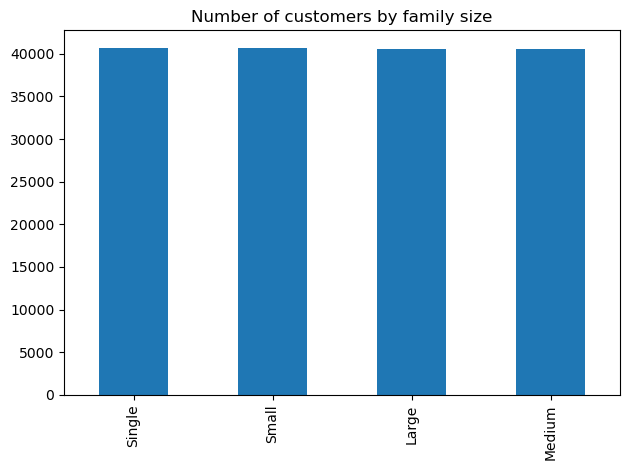

In [72]:
# Bar chart of count of family_size

family_size_bar = distinct_user['family_size'].value_counts().plot.bar()
plt.title('Number of customers by family size')
plt.tight_layout()

In [96]:
# Export chart

family_size_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_size_bar.png'))

In [73]:
# Aggregate average, minimum and maximum of usage frequency and family size

ords_prods_cust2.groupby('family_size').agg({'median_days_last_order': ['mean', 'min', 'max']})

median_days_last_order           
                              mean  min   max
family_size                                  
Large                     9.949778  0.0  30.0
Medium                    9.972119  0.0  30.0
Single                    9.936475  0.0  30.0
Small                     9.969936  0.0  30.0

In [74]:
# Aggregate average, minimum and maximum of expenditure and family size

ords_prods_cust2.groupby('family_size').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
family_size                     
Large        7.792886  1.0  25.0
Medium       7.784014  1.0  25.0
Single       7.789550  1.0  25.0
Small        7.795910  1.0  25.0

In [75]:
# Compare family size and region

family_size_region = pd.crosstab(distinct_user['family_size'], distinct_user['region'], dropna = False)

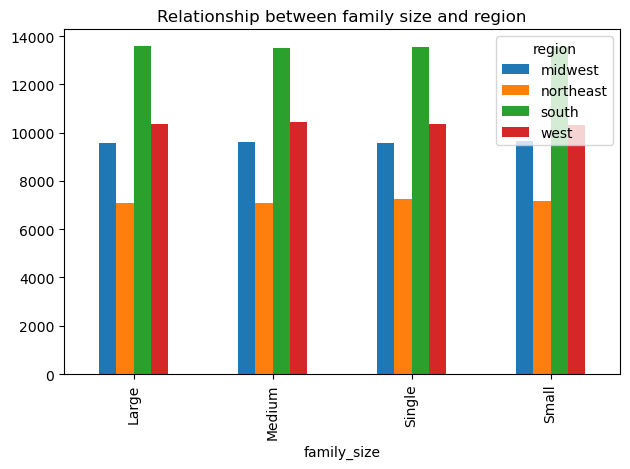

In [76]:
# Chart of family size and region

family_size_region.plot(kind = 'bar', stacked = False)
plt.title('Relationship between family size and region')
plt.tight_layout()

# Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'fam_size_region_bar.png'))

In [77]:
# Compare family size and department

family_size_dept = pd.crosstab(ords_prods_cust2['department'], ords_prods_cust2['family_size'], dropna = False)

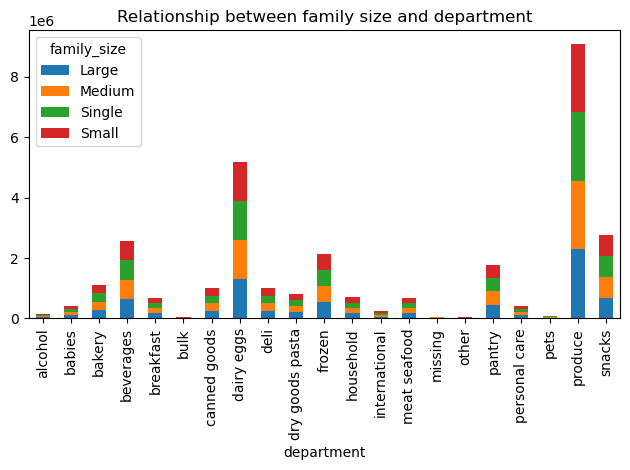

In [78]:
# Chart of family size and department

family_size_dept.plot(kind = 'bar', stacked = True)
plt.title('Relationship between family size and department')
plt.tight_layout()

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'fam_size_dept_bar.png'))

### Profiling customers with babies

In [79]:
# Check for orders in babies department. If no order assign 0 to row in new column 'baby_order'

ords_prods_cust2.loc[ords_prods_cust2['department'] != 'babies', 'baby_order'] = 0

In [80]:
# Check for orders in babies department. If there is an order, assign 1 to row in 'baby_order' column

ords_prods_cust2.loc[ords_prods_cust2['department'] == 'babies', 'baby_order'] = 1

In [81]:
ords_prods_cust2.shape

(30959687, 35)

In [82]:
# Check results

ords_prods_cust2['baby_order'].value_counts(dropna = False)

0.0    30549295
1.0      410392
Name: baby_order, dtype: int64

In [83]:
# Grouping total number of orders from the babies department by user id. 

ords_prods_cust2['baby_order'] = ords_prods_cust2.groupby(['user_id'])['baby_order'].transform(np.sum)

In [84]:
# Statistics for baby order column

ords_prods_cust2['baby_order'].describe().round()

count    30959687.0
mean            8.0
std            27.0
min             0.0
25%             0.0
50%             0.0
75%             2.0
max           808.0
Name: baby_order, dtype: float64

In [85]:
# Customer baby status flag (No)

ords_prods_cust2.loc[ords_prods_cust2['baby_order'] == 0, 'baby_status'] = 'No'

In [86]:
# Customer baby status flag (Yes)

ords_prods_cust2.loc[ords_prods_cust2['baby_order'] != 0, 'baby_status'] = 'Yes'

In [87]:
# Check results

ords_prods_cust2['baby_status'].value_counts(dropna = False)

No     21150575
Yes     9809112
Name: baby_status, dtype: int64

In [88]:
ords_prods_cust2.shape

(30959687, 36)

In [89]:
# Create another subset dataframe with distinct user ids. This subset will contain the newly derived columns

distinct_user2 = ords_prods_cust2.drop_duplicates(subset=['user_id'])

In [91]:
distinct_user2.shape

(162631, 36)

In [92]:
distinct_user2.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,no_of_dependants,marital_status,income,department,region,age_profile,income_profile,family_size,baby_order,baby_status
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,3,married,40423,beverages,south,Young adult,Low income,Large,0.0,No
13,2968173.0,15,15.0,1.0,9.0,7.0,196.0,2.0,0.0,Soda,...,0,divorced/widowed,54313,beverages,midwest,Seniors,Low income,Single,0.0,No
33,2293453.0,19,2.0,5.0,14.0,6.0,196.0,3.0,0.0,Soda,...,1,married,151988,beverages,south,Middle age,Middle income,Small,0.0,No
59,1573906.0,21,10.0,3.0,10.0,6.0,196.0,2.0,0.0,Soda,...,0,divorced/widowed,124643,beverages,west,Seniors,Middle income,Single,0.0,No
109,1593000.0,31,10.0,3.0,8.0,7.0,196.0,17.0,0.0,Soda,...,1,married,52311,beverages,south,Middle age,Low income,Small,0.0,No


In [93]:
# Check baby status column frequency

distinct_user2['baby_status'].value_counts(dropna = False)

No     132401
Yes     30230
Name: baby_status, dtype: int64

Text(0.5, 1.0, 'Chart of customer baby staus')

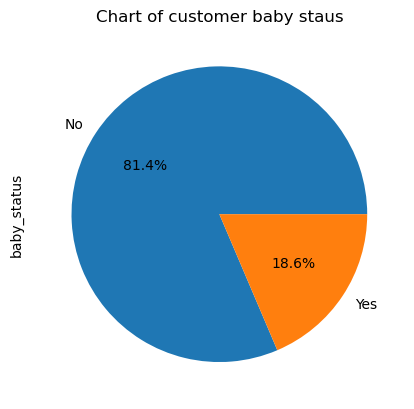

In [94]:
# Pie chart of baby_status

baby_status_pie = distinct_user2['baby_status'].value_counts().plot(kind = 'pie', autopct='%1.1f%%',)
plt.title('Chart of customer baby staus')

In [95]:
# Export chart

baby_status_pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'baby_status_pie.png'))

In [96]:
# Aggregate average, minimum and maximum of usage frequency and customer baby status

ords_prods_cust2.groupby('baby_status').agg({'median_days_last_order': ['mean', 'min', 'max']})


median_days_last_order           
                              mean  min   max
baby_status                                  
No                       10.731173  0.0  30.0
Yes                       8.287897  0.0  30.0

In [97]:
# Aggregate average, minimum and maximum of expenditure and customer baby status

ords_prods_cust2.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
No           7.770758  1.0  25.0
Yes          7.833353  1.0  25.0

In [98]:
distinct_user2.shape

(162631, 36)

In [99]:
# Subset of customers with babies

baby_sub = distinct_user2.loc[distinct_user2['baby_status'] == 'Yes']

In [101]:
baby_sub.shape

(30230, 36)

In [102]:
# Compare customer baby status and region

baby_status_region = pd.crosstab(baby_sub['region'], baby_sub['baby_status'], dropna = False)

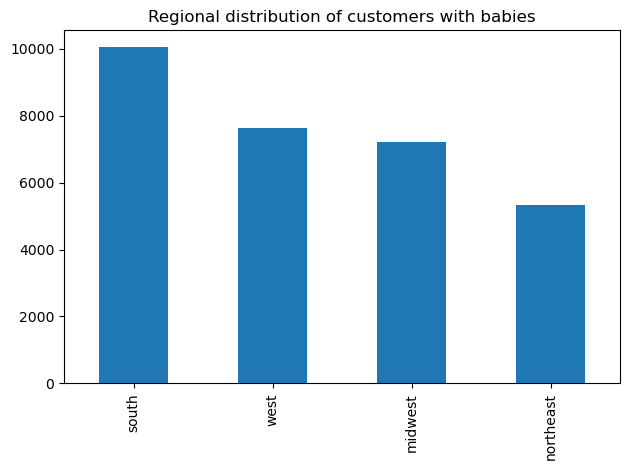

In [103]:
# Chart of customers with babies and region

baby_region_bar = baby_sub['region'].value_counts().plot.bar()
plt.title('Regional distribution of customers with babies')
plt.tight_layout()

In [112]:
# Export chart

baby_region_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'baby_region_bar.png'))

In [104]:
# Compare customer baby status and department

baby_status_dept = pd.crosstab(ords_prods_cust2['department'], ords_prods_cust2['baby_status'], dropna = False)

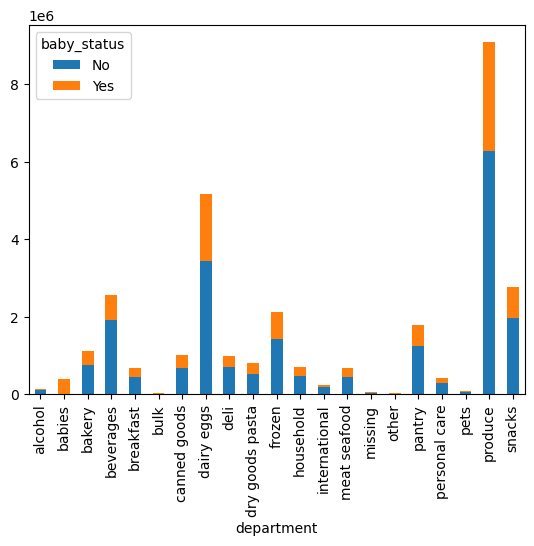

In [105]:
# Chart of customer baby status and department

baby_status_dept.plot(kind = 'bar', stacked = True)

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'baby_status_dept_bar.png'))

### Profiling customers with pets

In [106]:
# Check for orders in pets department. If no order assign 0 to row in new column 'pet_order'

ords_prods_cust2.loc[ords_prods_cust2['department'] != 'pets', 'pet_order'] = 0

In [107]:
# Check for orders in pets department. If there is an order, assign 1 to row in 'pet_order' column

ords_prods_cust2.loc[ords_prods_cust2['department'] == 'pets', 'pet_order'] = 1

In [108]:
ords_prods_cust2.shape

(30959687, 37)

In [109]:
# Check result

ords_prods_cust2['pet_order'].value_counts(dropna = False)

0.0    30866627
1.0       93060
Name: pet_order, dtype: int64

In [110]:
# Grouping total number of orders from the pets department by user id. 

ords_prods_cust2['pet_order'] = ords_prods_cust2.groupby(['user_id'])['pet_order'].transform(np.sum)

In [111]:
# Statistics for pet order column

ords_prods_cust2['pet_order'].describe().round()

count    30959687.0
mean            1.0
std             9.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max           522.0
Name: pet_order, dtype: float64

In [112]:
# Customer pet status flag (No)

ords_prods_cust2.loc[ords_prods_cust2['pet_order'] == 0, 'pet_status'] = 'No'

In [113]:
# Customer pet status flag (Yes)

ords_prods_cust2.loc[ords_prods_cust2['pet_order'] != 0, 'pet_status'] = 'Yes'

In [114]:
ords_prods_cust2.shape

(30959687, 38)

In [115]:
# Check result

ords_prods_cust2['pet_status'].value_counts(dropna = False)

No     27509293
Yes     3450394
Name: pet_status, dtype: int64

In [116]:
# Update distinct_user2 subset

distinct_user2 = ords_prods_cust2.drop_duplicates(subset=['user_id'])

In [119]:
distinct_user2.shape

(162631, 38)

In [118]:
distinct_user2.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,department,region,age_profile,income_profile,family_size,baby_order,baby_status,pet_order,pet_status
0,2539329.0,1,1.0,2.0,8.0,NaN,196.0,1.0,0.0,Soda,...,40423,beverages,south,Young adult,Low income,Large,0.0,No,0.0,No
13,2968173.0,15,15.0,1.0,9.0,7.0,196.0,2.0,0.0,Soda,...,54313,beverages,midwest,Seniors,Low income,Single,0.0,No,0.0,No
33,2293453.0,19,2.0,5.0,14.0,6.0,196.0,3.0,0.0,Soda,...,151988,beverages,south,Middle age,Middle income,Small,0.0,No,0.0,No
59,1573906.0,21,10.0,3.0,10.0,6.0,196.0,2.0,0.0,Soda,...,124643,beverages,west,Seniors,Middle income,Single,0.0,No,0.0,No
109,1593000.0,31,10.0,3.0,8.0,7.0,196.0,17.0,0.0,Soda,...,52311,beverages,south,Middle age,Low income,Small,0.0,No,0.0,No


In [120]:
# Check pet status column frequency

distinct_user2['pet_status'].value_counts(dropna = False)

No     149456
Yes     13175
Name: pet_status, dtype: int64

Text(0.5, 1.0, 'Chart of customer pet status')

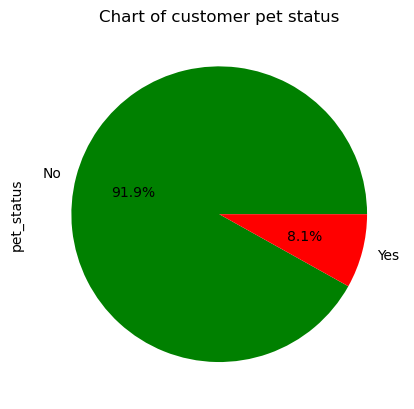

In [121]:
# Pie chart of pet_status

pet_status_pie = distinct_user2['pet_status'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors = ['green', 'red'])
plt.title('Chart of customer pet status')

In [122]:
# Export chart

pet_status_pie.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pet_status_pie.png'))

In [123]:
# Aggregate average, minimum and maximum of usage frequency and customer pet status

ords_prods_cust2.groupby('pet_status').agg({'median_days_last_order': ['mean', 'min', 'max']})

median_days_last_order           
                             mean  min   max
pet_status                                  
No                      10.052286  0.0  30.0
Yes                      9.197818  0.0  30.0

In [124]:
# Aggregate average, minimum and maximum of expenditure and customer prt status

ords_prods_cust2.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
No          7.787939  1.0  25.0
Yes         7.811730  1.0  25.0

In [125]:
# Subset of customers with pets

pet_sub = distinct_user2.loc[distinct_user2['pet_status'] == 'Yes']

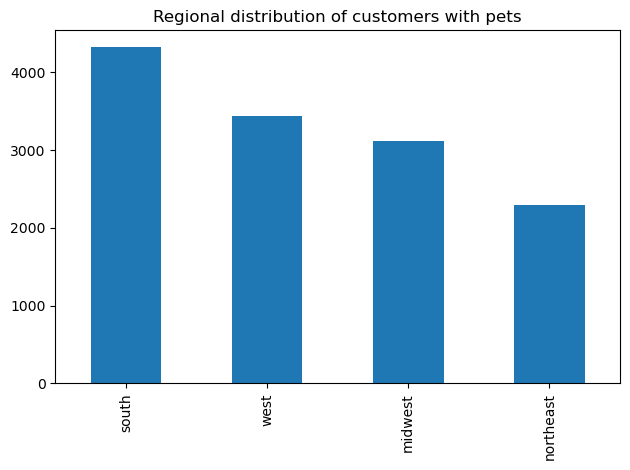

In [126]:
# Chart of customers with pets and region

pet_region_bar = pet_sub['region'].value_counts().plot.bar()
plt.title('Regional distribution of customers with pets')
plt.tight_layout()

In [119]:
# Export chart

pet_region_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pet_region_bar.png'))

In [127]:
# Compare department and  customer pet status

pet_status_dept = pd.crosstab(ords_prods_cust2['department'], ords_prods_cust2['pet_status'], dropna = False)

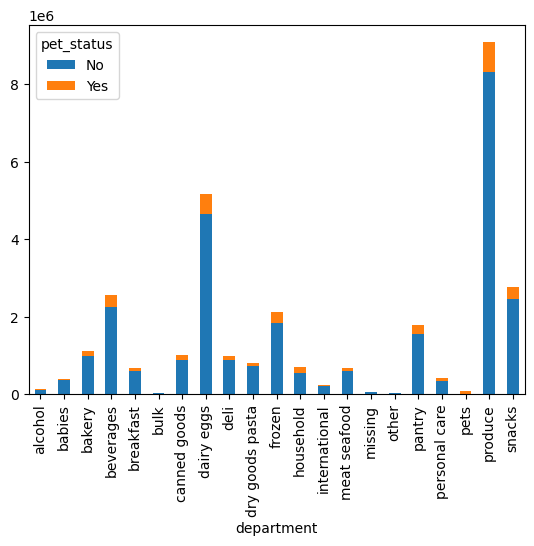

In [128]:
# Chart of department and  customer pet status

pet_status_dept.plot(kind = 'bar', stacked = True)

# Export chart

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pet_status_dept_bar.png'))

#### Visualizations for answering key questions

In [129]:
ords_prods_cust2['order_hour_of_day'] = ords_prods_cust2['order_hour_of_day'].astype('int8')

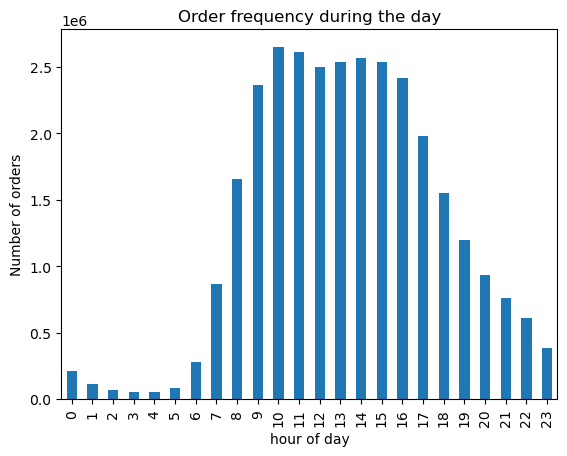

In [130]:
# Bar chart of the busiest hours of the day

busiest_hour = ords_prods_cust2['order_hour_of_day'].value_counts().sort_index().plot.bar()

plt.title('Order frequency during the day')
plt.xlabel('hour of day')
plt.ylabel('Number of orders')

# Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'busiest_hours.png'))

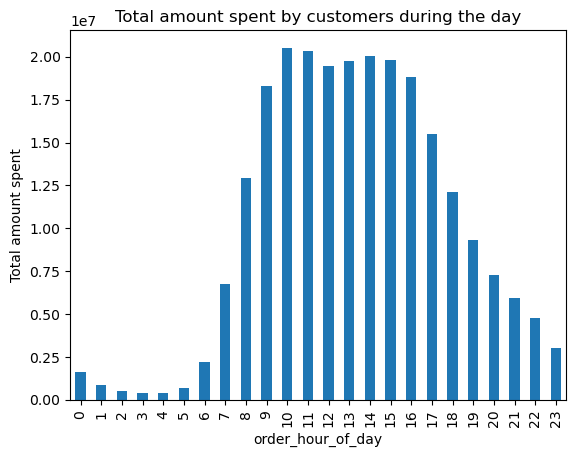

In [132]:
# Bar chart of hour of day and prices

ords_prods_cust2.groupby('order_hour_of_day')['prices'].sum().plot(kind = 'bar')
plt.title('Total amount spent by customers during the day')
plt.ylabel('Total amount spent')

# Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hours_prices.png'))

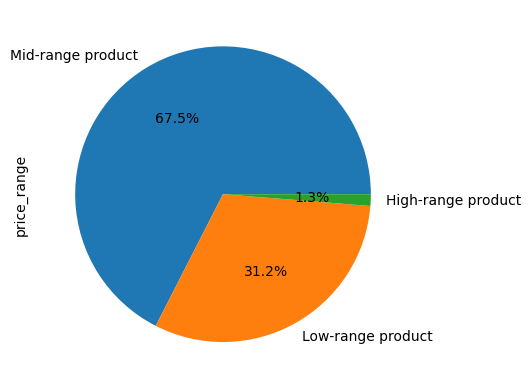

In [133]:
# Pie chart of price range groupings

ords_prods_cust2['price_range'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

# Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'prices_percent.png'))

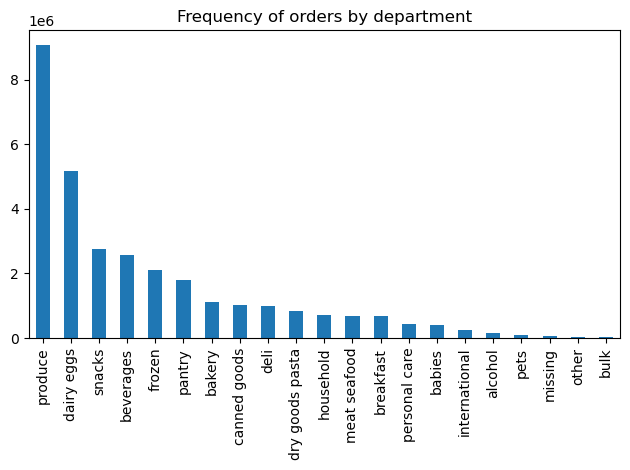

In [134]:
# Chart of the frequency of orders by department

dept_freq = ords_prods_cust2['department'].value_counts().plot.bar()
plt.title('Frequency of orders by department')
plt.tight_layout()

# Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'dept_freq.png'))


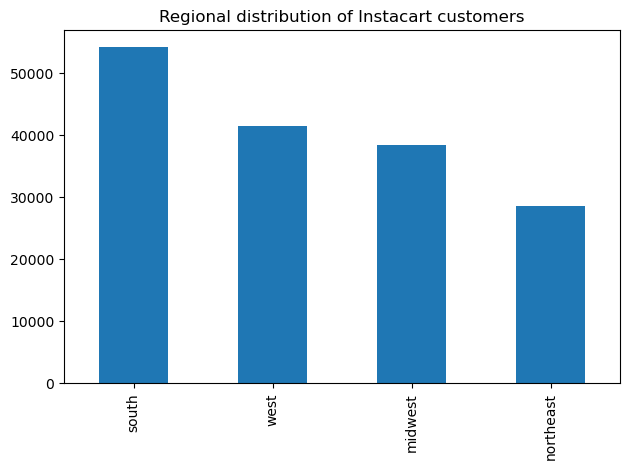

In [135]:
# Chart of customers by region

distinct_user2['region'].value_counts().plot.bar()
plt.title('Regional distribution of Instacart customers')
plt.tight_layout()

# Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'cust_region.png'))

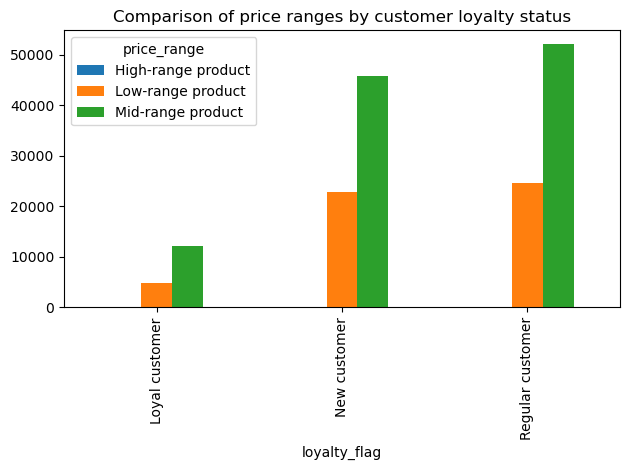

In [136]:
# Chart comparing price range and customer loyalty status

pd.crosstab(distinct_user2['loyalty_flag'], distinct_user2['price_range'], dropna = False).plot(kind = 'bar', stacked = False)
plt.title('Comparison of price ranges by customer loyalty status')
plt.tight_layout()

#Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_prices.png'))


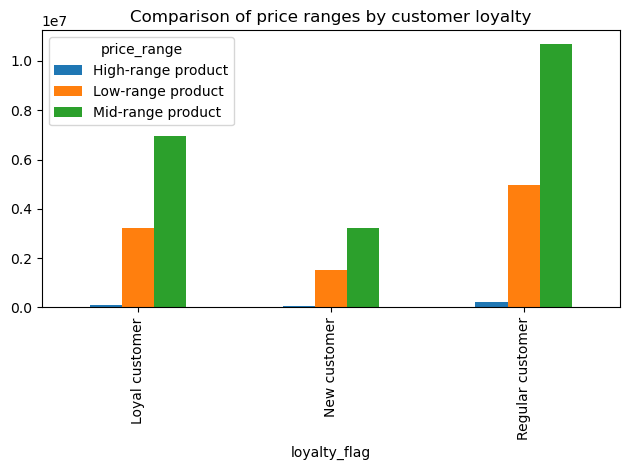

In [137]:
# Chart comparing price range and customer loyalty

pd.crosstab(ords_prods_cust2['loyalty_flag'], ords_prods_cust2['price_range'], dropna = False).plot(kind = 'bar', stacked = False)
plt.title('Comparison of price ranges by customer loyalty')
plt.tight_layout()

# Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_prices.png'))

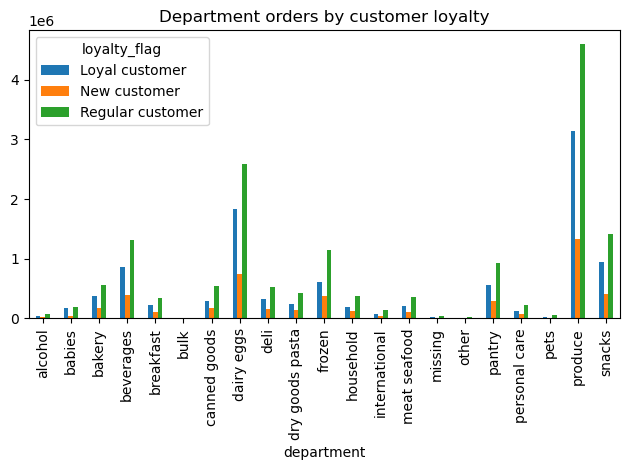

In [138]:
# Chart comparing department and customer loyalty

pd.crosstab(ords_prods_cust2['department'], ords_prods_cust2['loyalty_flag'], dropna = False).plot(kind = 'bar', stacked = False)
plt.title('Department orders by customer loyalty')
plt.tight_layout()

#Export chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'loyalty_dept.png'))

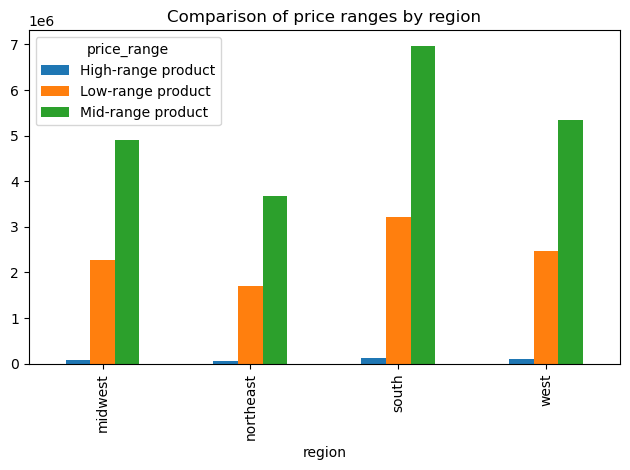

In [139]:
# Chart comparing price range and region

pd.crosstab(ords_prods_cust2['region'], ords_prods_cust2['price_range'], dropna = False).plot(kind = 'bar', stacked = False)
plt.title('Comparison of price ranges by region')
plt.tight_layout()

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_prices.png'))


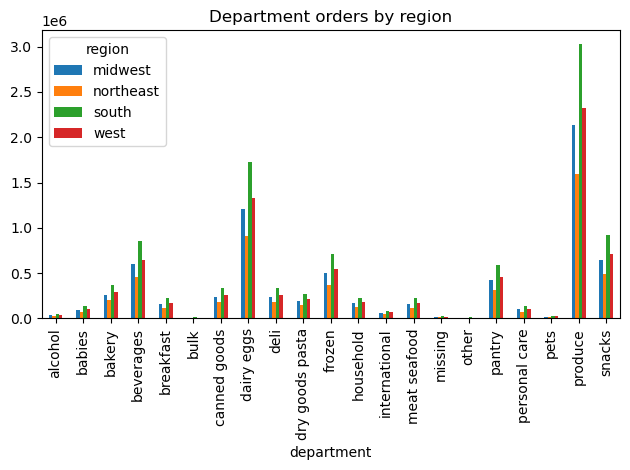

In [140]:
# Chart comparing department and region

pd.crosstab(ords_prods_cust2['department'], ords_prods_cust2['region'], dropna = False).plot(kind = 'bar', stacked = False)
plt.title('Department orders by region')
plt.tight_layout()

plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'region_dept.png'))


### Exporting data

In [142]:
ords_prods_cust2.shape

(30959687, 38)

In [141]:
ords_prods_cust2.to_pickle(os.path.join(path, '02. Data', 'Prepared data', 'instacart_combined_final_task.pkl'))